In [1]:
import numpy as np
from PIL import Image, ImageFilter, ImageChops
import matplotlib.pyplot as plt

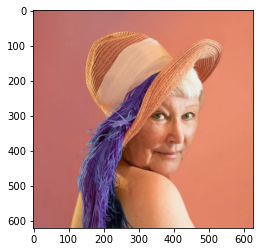

In [4]:
#1
with Image.open('OldLenna.png') as lenna_c:
    plt.imshow(lenna_c)

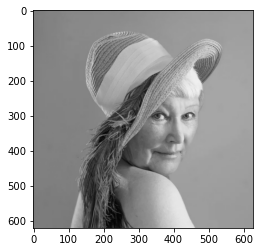

In [5]:
grayscale = lambda src : np.dot(src[... , :3], [0.299 , 0.587, 0.114])
with Image.fromarray(grayscale(np.asarray(lenna_c))) as lenna_gs:
    plt.imshow(lenna_gs)

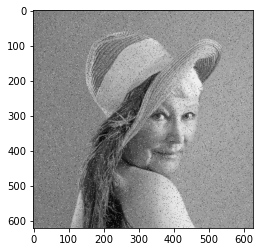

In [6]:
#2
def salt_and_pepper(img, amount, salt_vs_pepper):
    rng = np.random.default_rng()
    flipped = rng.random(img.size) <= amount 
    salted = rng.random(img.size) <= salt_vs_pepper 
    peppered = ~salted

    img_arr = np.copy(img)
    img_arr[np.transpose(flipped & salted)] = 255
    img_arr[np.transpose(flipped & peppered)] = 0    

    return Image.fromarray(img_arr)

with salt_and_pepper(lenna_gs, 0.05, 0.5) as lenna_sp:
    plt.imshow(lenna_sp)

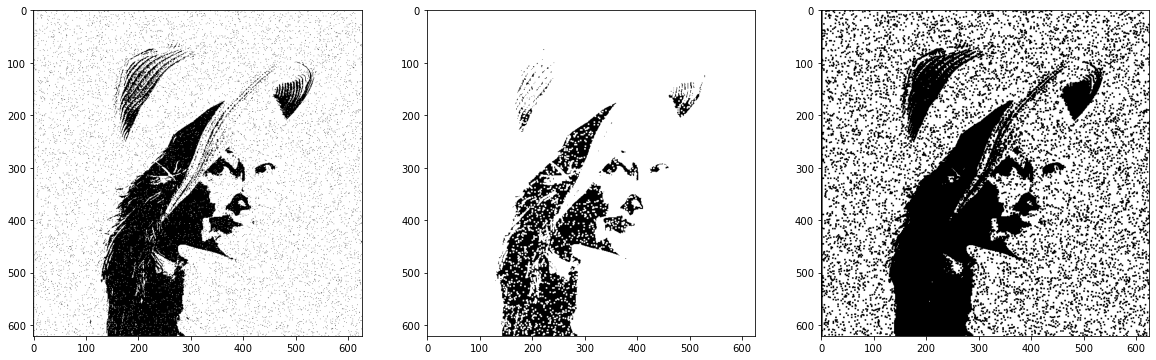

In [24]:
#3
def binary_image(img, threshold):
    img_arr = np.copy(img)
    img_arr[img_arr < threshold] = 0
    img_arr[img_arr >= threshold] = 255    
    return Image.fromarray(np.uint8(img_arr))        

with binary_image(lenna_sp, 120) as lenna_b, \
    lenna_b.filter(ImageFilter.MaxFilter()) as lenna_bd, \
        lenna_b.filter(ImageFilter.MinFilter()) as lenna_be:
            plt.figure(figsize=(20,20))
            plt.subplot(1, 3, 1)
            plt.imshow(lenna_b, cmap=plt.cm.gist_gray)
            plt.subplot(1, 3, 2)
            plt.imshow(lenna_bd, cmap=plt.cm.gist_gray)
            plt.subplot(1, 3, 3)
            plt.imshow(lenna_be, cmap=plt.cm.gist_gray)

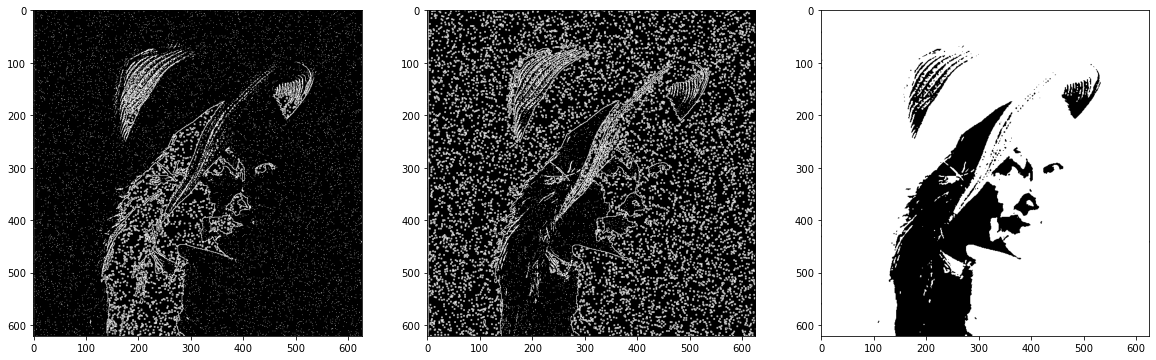

In [25]:
#4,5
with ImageChops.difference(lenna_b, lenna_bd) as lenna_bdd, \
    ImageChops.difference(lenna_b, lenna_be) as lenna_bde, \
        lenna_b.filter(ImageFilter.MedianFilter) as lenna_bm:
            plt.figure(figsize=(20,20))
            plt.subplot(1, 3, 1)
            plt.imshow(lenna_bdd, cmap=plt.cm.gist_gray)
            plt.subplot(1, 3, 2)
            plt.imshow(lenna_bde, cmap=plt.cm.gist_gray)
            plt.subplot(1, 3, 3)
            plt.imshow(lenna_bm, cmap=plt.cm.gist_gray)